#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

El objetivo del ejercicio es por un lado jugar con una red neuronal para resolver un problema de regresión y por otro participar en una competición de datos. 


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [42]:
# carga de datos
import pandas as pd
# from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [43]:
train_feat = pd.read_csv('dengue_features_train.csv')
train_feat.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [44]:
train_feat.shape

(1456, 24)

Posteriormente subimos los datos que únicamente nos proporcionan el número de casos de dengue para las semanas de entrenamiento (dengue_labels_train)

In [45]:
train_labels = pd.read_csv('dengue_labels_train.csv')
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [46]:
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [47]:
train.shape

(1456, 25)

Finalmente subimos los datos para generar la evaluación final (dengue_features_test)

In [48]:
test = pd.read_csv('dengue_features_test.csv')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [49]:
test.shape

(416, 24)

# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [50]:
train.drop(["week_start_date", "year"], axis = 1, inplace = True)
test.drop(["week_start_date", "year"], axis = 1, inplace = True)
train.head()

,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [51]:
pd.isnull(train).sum()

city                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_case

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [52]:
train.interpolate(inplace=True)
pd.isnull(train).any()

city                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_preci

Y aplicamos lo mismo para el test

In [53]:
test.interpolate(inplace=True)
pd.isnull(test).any()

city                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_preci

### Selección de variables
A continuación, se obtiene las estadísticas más relevantes de las variables para ver que forma tienen

In [54]:
train[['precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 'station_precip_mm']].describe()

,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,station_precip_mm
count,1456.000000,1456.000000,1456.000000
mean,45.702091,45.702091,39.362294
std,43.651356,43.651356,47.285701
min,0.000000,0.000000,0.000000
25%,9.785000,9.785000,8.850000
50%,38.320000,38.320000,24.050000
75%,70.227500,70.227500,53.900000
max,390.600000,390.600000,543.300000


En el dataset aparecen varias variables repetidas, ya que provienen de bases de datos distintas: temperatura media, minima, máxima, precipitación total...
Para reducir la dimensionalidad y eliminar variables que indican lo mismo y por tanto muy correlacionadas entre si, se van a transformar columnas para quedarse solo con la media de las variables repetidas.
Como no todas las variables están en las mismas unidades, hay que convertirlas antes de hacer la  media. La temperatura está en Kelvin en las variables "reanalysis..." y en Celsius en las variables "station...". Para pasarla de Kelvin a Celsius hay que restarle 273.


In [55]:
# Temperatura media
train['temp_media'] = (train.reanalysis_air_temp_k - 273 + train.reanalysis_avg_temp_k - 273 + train.station_avg_temp_c)/3
test['temp_media'] = (test.reanalysis_air_temp_k - 273 + test.reanalysis_avg_temp_k - 273 + test.station_avg_temp_c)/3

# Precipitación total
train['prec_total'] = train[['precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 'station_precip_mm']].mean(axis=1)
test['prec_total'] = test[['precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 'station_precip_mm']].mean(axis=1)

# Temperatura máxima
train['temp_max'] = (train.station_max_temp_c + train.reanalysis_max_air_temp_k - 273)/2
test['temp_max'] = (test.station_max_temp_c + test.reanalysis_max_air_temp_k - 273)/2

# Temperatura mínima
train['temp_min'] = (train.station_min_temp_c + train.reanalysis_min_air_temp_k - 273)/2
test['temp_min'] = (test.station_min_temp_c + test.reanalysis_min_air_temp_k - 273)/2

# ndvi
train['ndvi_media'] = train[['ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw']].mean(axis=1)
test['ndvi_media'] = test[['ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw']].mean(axis=1)

train.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'station_avg_temp_c', 'precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 
            'station_precip_mm', 'station_max_temp_c', 'reanalysis_max_air_temp_k', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 
            'ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw'], 
           axis = 1, inplace = True)
test.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'station_avg_temp_c', 'precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 
            'station_precip_mm', 'station_max_temp_c', 'reanalysis_max_air_temp_k', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 
            'ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw'], 
           axis = 1, inplace = True)

Existen otras categorías del dataset que no aportan información valiosa y pueden ser borradas:
Las variables que indican el rango de temperatura son redundantes, ya que indican la diferencia entre la máxima y la mínima, por lo que se pueden eliminar.
También se elimina la variable "reanalysis_dew_point_temp_k", que indica la temperatura de rocío y es función de la humemdad y temperatura.
Las variables "reanalysis_specific_humidity_g_per_kg" y "reanalysis_precip_amt_kg_per_m2" indican la humedad y precipitación en otras unidades, por lo que también son eliminadas.

In [56]:
#train.drop(['station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2'], 
#           axis = 1, inplace = True)
#test.drop(['station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2'], 
#           axis = 1, inplace = True)

Se cambia el nombre de la columna que no se modificó para simplificar el dataframe

In [57]:
train.rename({'reanalysis_relative_humidity_percent': 'rel_humidity'}, inplace=True, axis=1)
test.rename({'reanalysis_relative_humidity_percent': 'rel_humidity'}, inplace=True, axis=1)

El dataset queda de la siguiente manera, con 6 características + la columna objetivo

Como tenemos 2 ciudades distintas, que pueden tener comportamientos diferentes, haremos un modelo para cada ciudad. Para ello dividimos el dataset en 2.

In [58]:
pd.options.mode.chained_assignment = None  # Para evitar que salga un warning que no afecta.

train_sj = train.loc[train.city == 'sj']
train_sj.drop('city', axis=1, inplace=True)
train_iq = train.loc[train.city == 'iq']
train_iq.drop('city', axis=1, inplace=True)
test_sj = test.loc[test.city == 'sj']
test_sj.drop('city', axis=1, inplace=True)
test_iq = test.loc[test.city == 'iq']
test_iq.drop('city', axis=1, inplace=True)
print("train_sj shape: ", train_sj.shape)
print("train_iq shape: ", train_iq.shape)
print("test_sj shape: ", test_sj.shape)
print("test_iq shape: ", test_iq.shape)

train_sj shape:  (936, 13)
train_iq shape:  (520, 13)
test_sj shape:  (260, 12)
test_iq shape:  (156, 12)


In [59]:
train_sj.head()

,weekofyear,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,rel_humidity,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,total_cases,temp_media,prec_total,temp_max,temp_min,ndvi_media
0,18,292.414286,32.00,73.365714,14.012857,2.628571,6.900000,4,24.919524,13.613333,28.10,21.45,0.150606
1,19,293.951429,17.94,77.368571,15.372857,2.371429,6.371429,5,25.789524,18.080000,29.80,22.80,0.157479
2,20,295.434286,26.10,82.052857,16.848571,2.300000,6.485714,4,26.124762,36.826667,29.85,23.55,0.133315
3,21,295.310000,13.90,80.337143,16.672857,2.428571,6.771429,3,26.562381,11.573333,30.85,23.65,0.209286
4,22,295.821429,12.20,80.460000,17.210000,3.014286,9.371429,6,27.375238,6.946667,31.95,24.20,0.239235


In [60]:
# Ponemos la columna 'total_cases al final del dataframe
cases = train_sj.pop("total_cases")
train_sj.insert(len(train_sj.columns), 'total_cases', cases)
cases = train_iq.pop("total_cases")
train_iq.insert(len(train_iq.columns), 'total_cases', cases)

In [61]:
variables = train_sj.columns.drop(['total_cases','weekofyear'])
etiquetas = [v + '_lw' for v in variables]

for df in [train_sj, train_iq, test_sj, test_iq]:
    df.reset_index(inplace=True, drop=True)
    for v, e in zip(variables,etiquetas):
        df.insert(loc=0, column=e, value = train[v])

    for row in df.itertuples():
        i = row.Index
        if i < 2 :
            continue
        else:
            for v, e in zip(variables,etiquetas):
                df[e].loc[i] = df[v].loc[i-1]*0.7 + df[v].loc[i-2]*0.3

In [62]:
train_iq.head()

,ndvi_media_lw,temp_min_lw,temp_max_lw,prec_total_lw,temp_media_lw,station_diur_temp_rng_c_lw,reanalysis_tdtr_k_lw,reanalysis_specific_humidity_g_per_kg_lw,rel_humidity_lw,reanalysis_precip_amt_kg_per_m2_lw,...,rel_humidity,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,temp_media,prec_total,temp_max,temp_min,ndvi_media,total_cases
0,0.150606,21.450,28.100,13.613333,24.919524,6.900000,2.628571,14.012857,73.365714,32.000,...,92.418571,16.651429,8.928571,10.775000,25.196667,17.940000,33.40,20.40,0.228307,0
1,0.157479,22.800,29.800,18.080000,25.789524,6.371429,2.371429,15.372857,77.368571,17.940,...,93.581429,16.862857,10.314286,11.566667,25.320952,58.940000,33.80,19.45,0.256012,0
2,0.247700,19.735,33.680,46.640000,25.283667,11.329167,9.898571,16.799429,93.232571,45.157,...,95.848571,17.120000,7.385714,11.466667,24.869524,49.713333,32.25,20.15,0.170504,0
3,0.196156,19.940,32.715,52.481333,25.004952,11.496667,8.264286,17.042857,95.168429,59.139,...,87.234286,14.431429,9.114286,10.533333,23.784127,13.733333,31.05,15.15,0.206918,0
4,0.195994,16.650,31.410,24.527333,24.109746,10.813333,8.595714,15.238000,89.818571,36.203,...,88.161429,15.444286,9.500000,11.480000,24.889524,43.173333,33.65,18.80,0.316546,0


<AxesSubplot: >

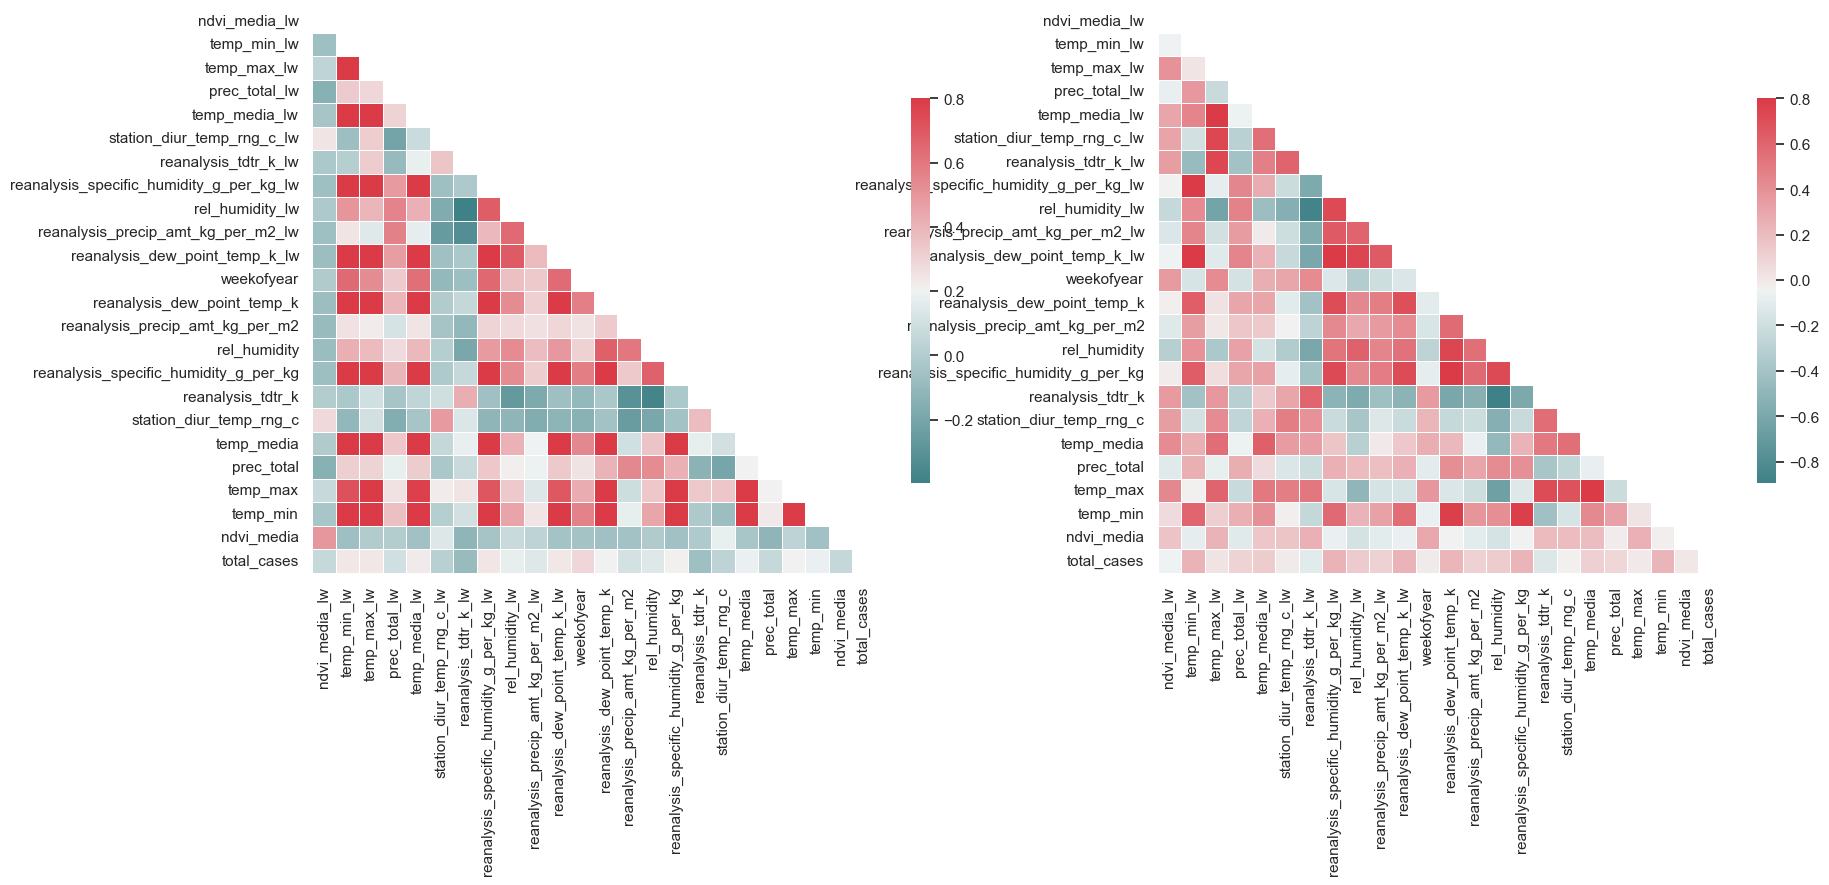

In [63]:
# Se obtienen los coeficientes de correlacion para lo que hay que trasponer el dataframe
R_sj = train_sj.corr()
R_iq = train_iq.corr()

# Gráfico de la matriz de correlaciones
sns.set(style="whitegrid")
mask = np.zeros_like(R_sj, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, (ax1 , ax2) = plt.subplots(1, 2, figsize=(20, 10))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R_sj, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=train_sj.columns, yticklabels=train_sj.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax1)

sns.heatmap(R_iq, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=train_iq.columns, yticklabels=train_iq.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax2)

Se observa que existen variables bastante correladas entre sí, como era de esperar: precipitación con la humedad, temperatura mínima con la media, ndvi con temperatura máxima y mínima. De momento no se elimina ninguna más hasta avanzar más con la exploración. 
También se ve que las variables más correlacionadas con total_cases son: temp_media, temp_min y city_bin. Estas son las que serán las más importantes en el modelo.

(-0.15, 0.3)

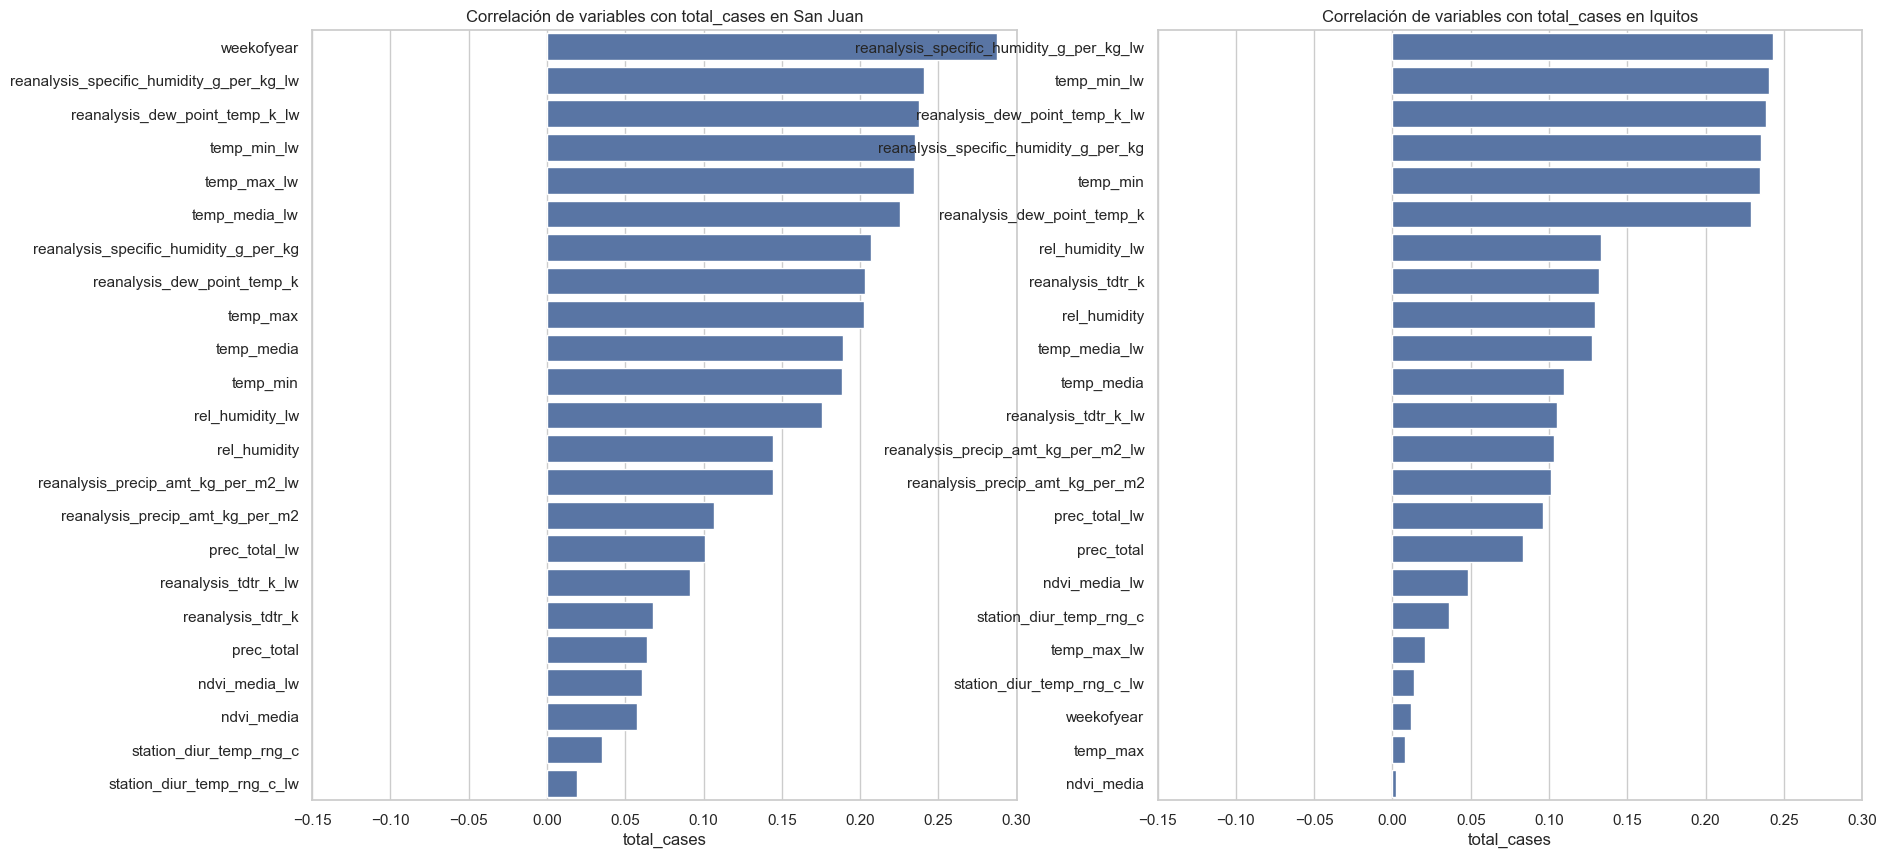

In [64]:
R_sj_ord = abs(R_sj).sort_values(by='total_cases', axis=0, ascending=False).drop('total_cases')
R_iq_ord = abs(R_iq).sort_values(by='total_cases', axis=0, ascending=False).drop('total_cases')

f, (ax1 , ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(x=R_sj_ord.total_cases, y=R_sj_ord.index, color="b", ax=ax1)
sns.barplot(x=R_iq_ord.total_cases, y=R_iq_ord.index, color="b", ax=ax2)
ax1.set_title('Correlación de variables con total_cases en San Juan')
ax2.set_title('Correlación de variables con total_cases en Iquitos')
ax1.set_xlim(-0.15,0.30)
ax2.set_xlim(-0.15,0.30)

In [65]:
var_sj_elim = R_sj_ord.tail(len(R_sj_ord)-6).index
var_iq_elim = R_iq_ord.tail(len(R_sj_ord)-6).index
train_sj.drop(var_sj_elim, axis=1, inplace=True)
train_iq.drop(var_iq_elim, axis=1, inplace=True)
test_sj.drop(var_sj_elim, axis=1, inplace=True)
test_iq.drop(var_iq_elim, axis=1, inplace=True)
print('Dataframe San Juan: ', train_sj.shape)
print('Dataframe Iquitos: ', train_sj.shape)

Dataframe San Juan:  (936, 7)
Dataframe Iquitos:  (936, 7)


In [66]:
train_sj.head()

,temp_min_lw,temp_max_lw,temp_media_lw,reanalysis_specific_humidity_g_per_kg_lw,reanalysis_dew_point_temp_k_lw,weekofyear,total_cases
0,21.450,28.100,24.919524,14.012857,292.414286,18,4
1,22.800,29.800,25.789524,15.372857,293.951429,19,5
2,22.395,29.290,25.528524,14.964857,293.490286,20,4
3,23.325,29.835,26.024190,16.405857,294.989429,21,3
4,23.620,30.550,26.431095,16.725571,295.347286,22,6


In [67]:
train_iq.head()

,temp_min_lw,reanalysis_specific_humidity_g_per_kg_lw,reanalysis_dew_point_temp_k_lw,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,temp_min,total_cases
0,21.450,14.012857,292.414286,295.184286,16.651429,20.40,0
1,22.800,15.372857,293.951429,295.358571,16.862857,19.45,0
2,19.735,16.799429,295.306286,295.622857,17.120000,20.15,0
3,19.940,17.042857,295.543571,292.797143,14.431429,15.15,0
4,16.650,15.238000,293.644857,293.957143,15.444286,18.80,0


### Eliminación de outliers
Para ver si hay outliers presentes en el dataset, se dibujan los boxplots de cada columna.

<AxesSubplot: >

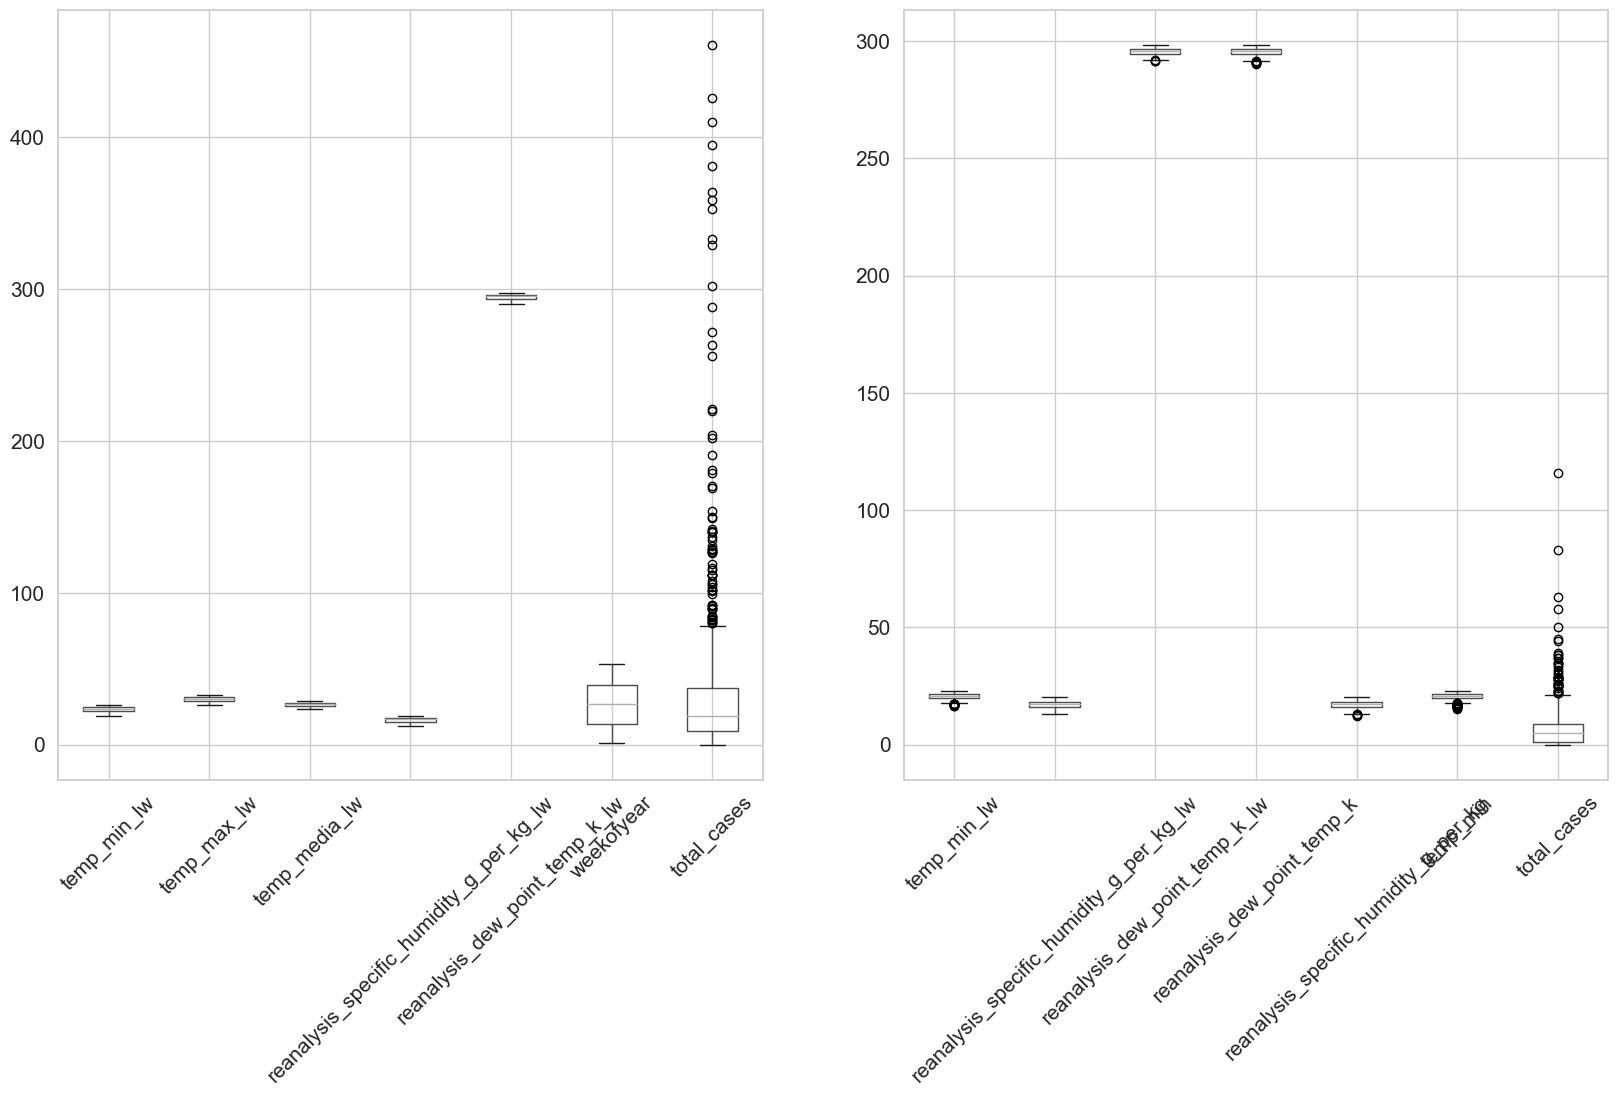

In [68]:
f, (ax1 , ax2) = plt.subplots(1, 2, figsize=(20, 10))
train_sj.boxplot(fontsize=15, rot=45, ax=ax1)
train_iq.boxplot(fontsize=15, rot=45, ax=ax2)

Se borran los outliers observados, analizados con más profundidad en la actividad 1

In [69]:
print('Outliers eliminados para San Juan: ', len(train_sj[train_sj.total_cases > 300]),
    ' (', round((len(train_sj[train_sj.total_cases > 300]))/len(train_sj)*100,2), '%)')
print('Outliers eliminados para Iquitos: ', len(train_iq[train_iq.total_cases > 50]),
    ' (', round((len(train_iq[train_iq.total_cases > 50]))/len(train_iq)*100,2), '%)')


Outliers eliminados para San Juan:  11  ( 1.18 %)
Outliers eliminados para Iquitos:  4  ( 0.77 %)


In [70]:
train_sj.drop(train_sj[train_sj.total_cases > 300].index, inplace=True)
train_iq.drop(train_iq[train_iq.total_cases > 50].index, inplace=True)

In [71]:
train_sj.reset_index(inplace=True, drop=True)
train_iq.reset_index(inplace=True, drop=True)

### Normalización
Por último, se normalizan todas las variables para que las técnicas de aprendizaje automático funcionen mejor.

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sj_norm = scaler.fit_transform(train_sj.drop('total_cases', axis=1))
X_test_sj_norm = scaler.transform(test_sj)
X_train_iq_norm = scaler.fit_transform(train_iq.drop('total_cases', axis=1))
X_test_iq_norm = scaler.transform(test_iq)
print('Máximos train: ', X_train_sj_norm.max(axis=0))
print('Mínimos train: ', X_train_sj_norm.min(axis=0))
print('Máximos test: ', X_test_sj_norm.max(axis=0))
print('Mínimos test: ', X_test_sj_norm.min(axis=0))

Máximos train:  [1. 1. 1. 1. 1. 1.]
Mínimos train:  [0. 0. 0. 0. 0. 0.]
Máximos test:  [1.04351032 0.98868778 0.96129245 1.01584507 1.02007602 1.        ]
Mínimos test:  [0.27654867 0.07616893 0.1689895  0.11215824 0.15236332 0.        ]


# Construcción y evaluación preliminar del modelo

In [73]:
labels = train_sj.columns.drop('total_cases')
train_sj_norm = pd.DataFrame(X_train_sj_norm, columns=labels)
train_sj_norm['total_cases'] = train_sj['total_cases']
train_iq_norm = pd.DataFrame(X_train_iq_norm, columns=labels)
train_iq_norm['total_cases'] = train_iq['total_cases']

test_sj_norm = pd.DataFrame(X_test_sj_norm, columns=labels)
test_iq_norm = pd.DataFrame(X_test_iq_norm, columns=labels)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
    
regressor_sj = RandomForestRegressor()
regressor_iq = RandomForestRegressor()

param = {"n_estimators": [24, 32, 40], # Number of trees in random forest
        "max_features": [3, 4], # Number of features to consider at every split
        "max_depth": [6,4,3], # Maximum number of levels in tree
        "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
        "min_samples_leaf": [6, 8, 10], # Minimum number of samples required at each leaf node
        "bootstrap": [True, False] # Method of selecting samples for training each tree
        }

grid_sj = GridSearchCV(estimator = regressor_sj, param_grid= param, cv=5)
grid_iq = GridSearchCV(estimator = regressor_iq, param_grid= param, cv=5)

grid_sj_fit = grid_sj.fit(X = X_train_sj_norm, y = train_sj.total_cases)
grid_iq_fit = grid_iq.fit(X = X_train_iq_norm, y = train_iq.total_cases)

In [75]:
best_sj = grid_sj_fit.best_estimator_
best_iq = grid_iq_fit.best_estimator_
print("Modelo San Juan: ", best_sj)
print("Modelo Iquitos: ", best_sj)

Modelo San Juan:  RandomForestRegressor(max_depth=4, max_features=4, min_samples_leaf=6,
                      min_samples_split=4, n_estimators=32)
Modelo Iquitos:  RandomForestRegressor(max_depth=4, max_features=4, min_samples_leaf=6,
                      min_samples_split=4, n_estimators=32)


c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<AxesSubplot: >

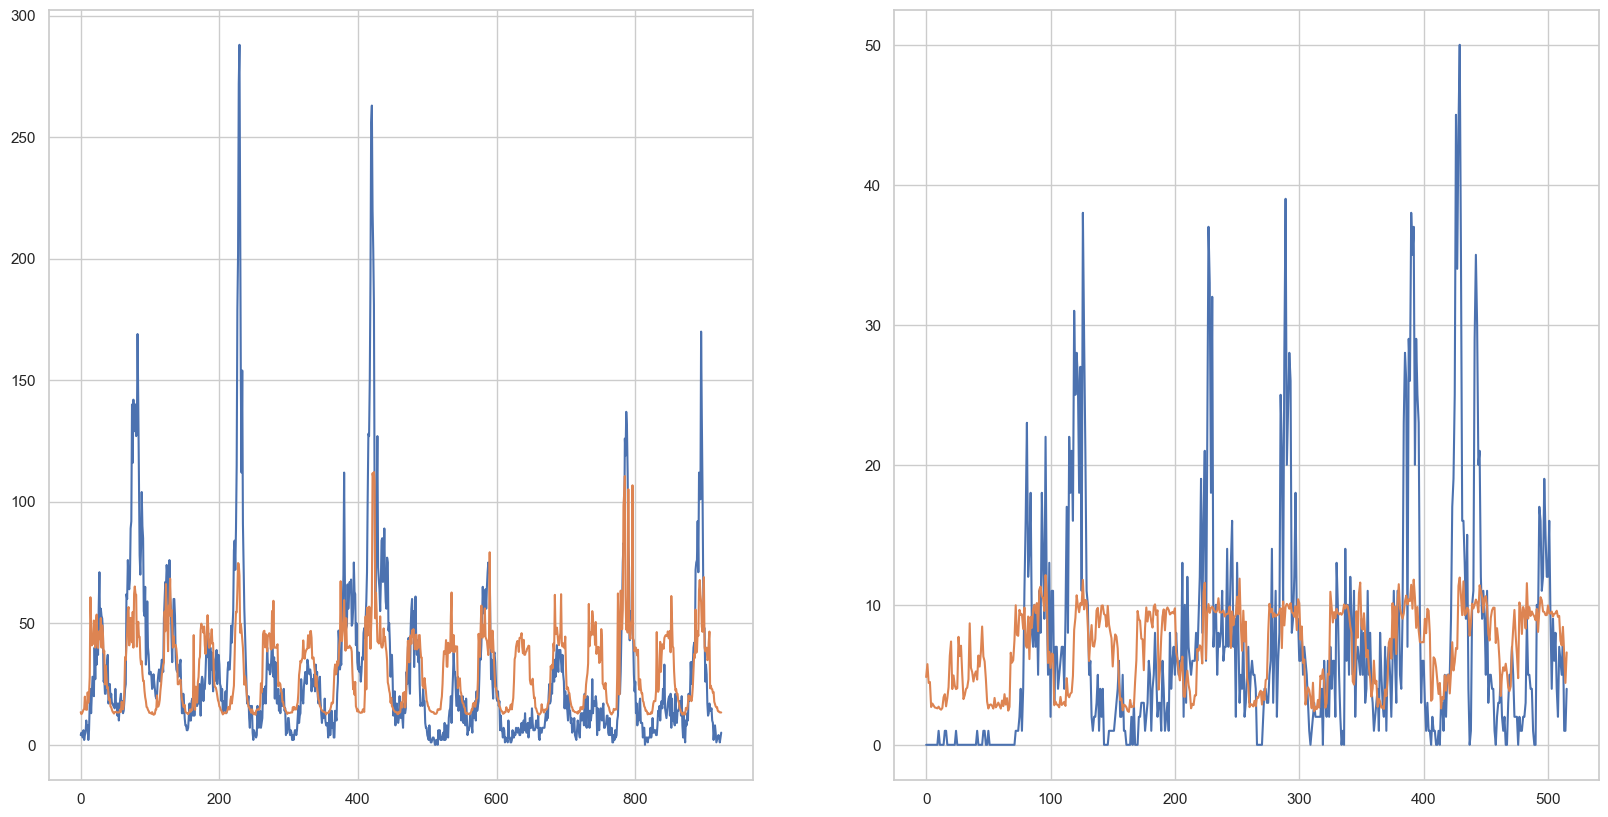

In [76]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

train_sj['predicciones'] = best_sj.predict(train_sj_norm.drop('total_cases', axis=1))
train_iq['predicciones'] = best_iq.predict(train_iq_norm.drop('total_cases', axis=1))

train_sj.total_cases.plot(ax=axes[0], label="Real")
train_sj.predicciones.plot(ax=axes[0], label='Predicción')

train_iq.total_cases.plot(ax=axes[1], label="Real")
train_iq.predicciones.plot(ax=axes[1], label='Predicción')

In [77]:
from sklearn.metrics import mean_absolute_error

mae_sj = mean_absolute_error(train_sj.total_cases, train_sj.predicciones)
mae_iq = mean_absolute_error(train_iq.total_cases, train_iq.predicciones)
print("Mean Absolute Error (MAE) San Juan: %.3f" % mae_sj)
print("Mean Absolute Error (MAE) Iquitos: %.3f" % mae_iq)

Mean Absolute Error (MAE) San Juan: 17.587
Mean Absolute Error (MAE) Iquitos: 5.255


# Generación del Resultado Final

Generamos el fichero de salida segun el Submission format

* Realizamos la predicción sobre el test

In [78]:
test_sj_norm

,temp_min_lw,temp_max_lw,temp_media_lw,reanalysis_specific_humidity_g_per_kg_lw,reanalysis_dew_point_temp_k_lw,weekofyear
0,0.343658,0.297134,0.290200,0.268931,0.311003,0.326923
1,0.542773,0.553544,0.440601,0.466114,0.520729,0.346154
2,0.547198,0.499246,0.433447,0.532332,0.586726,0.365385
3,0.580383,0.639517,0.572085,0.616404,0.668531,0.384615
4,0.695428,0.803167,0.664581,0.563608,0.619394,0.403846
...,...,...,...,...,...,...
255,0.422566,0.303922,0.261132,0.112158,0.152363,0.230769
256,0.538348,0.607089,0.460597,0.412303,0.468570,0.250000
257,0.561209,0.728507,0.449014,0.544387,0.615047,0.269231
258,0.658555,0.693062,0.549636,0.573488,0.643680,0.288462


In [80]:
y_pred_sj = best_sj.predict(test_sj_norm)
y_pred_iq = best_iq.predict(test_iq_norm)

c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [81]:
y_pred = np.concatenate((y_pred_sj, y_pred_iq), axis=None)
len(y_pred)

416

* Redondeamos el resultado

In [82]:
# round the result and cast to int
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([ 13,  13,  13,  14,  13,  13,  20,  15,  17,  19,  18,  19,  23,
        38,  45,  39,  43,  42,  49, 105,  91,  50,  45,  49,  58,  60,
        55,  40,  38,  38,  40,  41,  39,  36,  37,  24,  30,  29,  23,
        23,  23,  18,  17,  16,  15,  14,  14,  14,  14,  14,  13,  13,
        13,  13,  13,  14,  14,  15,  14,  15,  17,  17,  23,  25,  30,
        47,  42,  39,  41,  42,  45,  45,  43,  44,  61,  46,  45,  45,
        45,  66,  54,  39,  49,  60,  40,  39,  40,  41,  31,  31,  27,
        29,  27,  20,  19,  20,  16,  19,  17,  14,  17,  14,  12,  13,
        13,  14,  21,  14,  17,  21,  65,  63,  53,  51,  60,  72,  74,
        83,  64,  51, 111, 111, 110, 110, 105, 102,  44,  38,  43,  82,
        47,  69,  50,  38,  40,  35,  37,  36,  39,  38,  24,  27,  25,
        25,  23,  20,  18,  17,  16,  16,  15,  14,  14,  14,  13,  13,
        13,  13,  14,  13,  13,  17,  21,  29,  65,  63,  57,  61,  53,
        47,  62,  45, 105,  71, 114,  97,  44,  46,  43,  40,  4

In [83]:
y_pred_no_neg = res.copy()

In [84]:
y_pred_no_neg[y_pred < 0] = 0
y_pred_no_neg

array([ 13,  13,  13,  14,  13,  13,  20,  15,  17,  19,  18,  19,  23,
        38,  45,  39,  43,  42,  49, 105,  91,  50,  45,  49,  58,  60,
        55,  40,  38,  38,  40,  41,  39,  36,  37,  24,  30,  29,  23,
        23,  23,  18,  17,  16,  15,  14,  14,  14,  14,  14,  13,  13,
        13,  13,  13,  14,  14,  15,  14,  15,  17,  17,  23,  25,  30,
        47,  42,  39,  41,  42,  45,  45,  43,  44,  61,  46,  45,  45,
        45,  66,  54,  39,  49,  60,  40,  39,  40,  41,  31,  31,  27,
        29,  27,  20,  19,  20,  16,  19,  17,  14,  17,  14,  12,  13,
        13,  14,  21,  14,  17,  21,  65,  63,  53,  51,  60,  72,  74,
        83,  64,  51, 111, 111, 110, 110, 105, 102,  44,  38,  43,  82,
        47,  69,  50,  38,  40,  35,  37,  36,  39,  38,  24,  27,  25,
        25,  23,  20,  18,  17,  16,  16,  15,  14,  14,  14,  13,  13,
        13,  13,  14,  13,  13,  17,  21,  29,  65,  63,  57,  61,  53,
        47,  62,  45, 105,  71, 114,  97,  44,  46,  43,  40,  4

In [85]:
len(y_pred)

416

* Generamos el fichero de salida

In [86]:
# generate output
test_original = pd.read_csv('dengue_features_test.csv')
output = pd.DataFrame({ 'city': test_original['city'], 'year': test_original['year'], 'weekofyear': test_original['weekofyear'], 
                       'total_cases': y_pred_no_neg})

name = 'RandomForest_extra' + '_results.csv'
output.to_csv(name, index= False)
# from google.colab import files

#with open('result.csv', 'w') as f:
#    output.to_csv(f,  index = False)
#files.download('result.csv')

output.head()


,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,13
2,sj,2008,20,13
3,sj,2008,21,14
4,sj,2008,22,13


<AxesSubplot: >

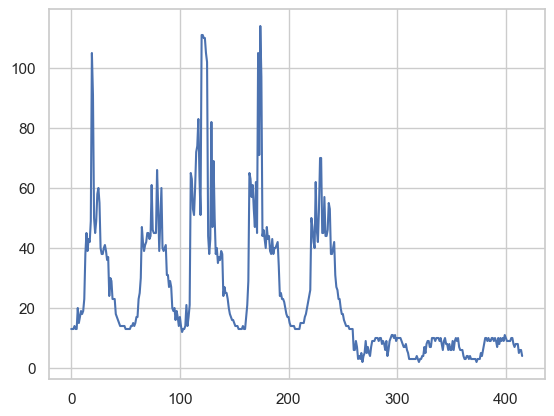

In [87]:
output.total_cases.plot()